In [1]:
import sys
sys.path.append( "..")

import plot

In [2]:
t, s, i, r, ssd, isd, rsd = plot.load('complete1000_100.csv')

In [3]:
di = []
sh = []
ih = []
for index in range(1, len(t)):
    di.append(i[index] - i[index-1])
    sh.append((s[index] + s[index-1])*0.5)
    ih.append((i[index] + i[index-1])*0.5)

In [4]:
si = []
sdelta = []
idelta = []
for index in range(0, len(di)):
    si.append(ih[index] * sh[index])
    sdelta.append(sh[index] * di[index])
    idelta.append(ih[index] * di[index])
import numpy, pandas
titles = ['si', 'sdelta', 'idelta']
matrix = [si, sdelta, idelta]
df = pandas.DataFrame(numpy.array(matrix).T, columns=titles)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
si,5.0,119830.50829,103193.155159,114.986775,28314.402775,151221.79590,172793.8204,246707.5356
sdelta,5.0,81000.00000,84285.199240,0.026450,1687.778550,72879.69120,139585.5918,190846.9120
idelta,5.0,99000.00000,103995.745747,229.973550,31834.408200,56182.22145,151553.0880,255200.3088


In [5]:
df.corr()

,si,sdelta,idelta
si,1.000000,0.928450,0.665673
sdelta,0.928450,1.000000,0.341283
idelta,0.665673,0.341283,1.000000


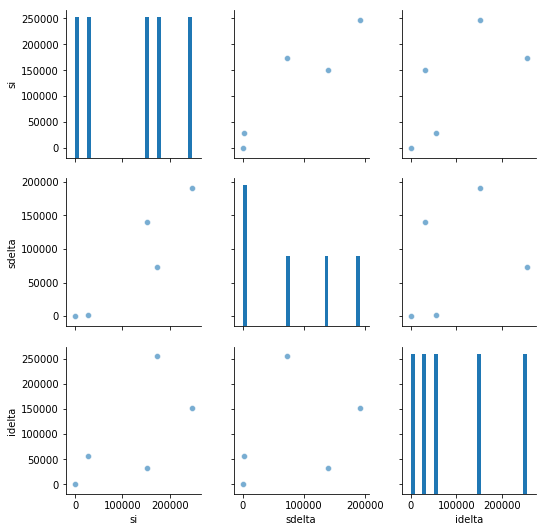

In [6]:
import seaborn as sns
sns.pairplot(df,
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
y = df['si'].values
df = df.drop('si', axis=1)
x = df.values
lm = LinearRegression(fit_intercept=False)
lm.fit(x, y)
y_pred = lm.predict(x)
msg = 'model: di = SI / ({} S + {} I)'.format(lm.coef_[0], lm.coef_[1])
print(msg)

model: di = SI / (0.9809842790572152 S + 0.3990696105648225 I)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

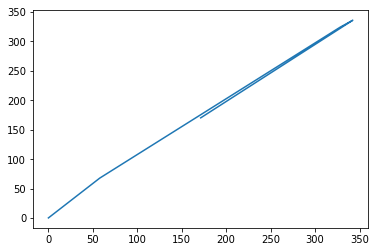

In [10]:
predicted = []
for index in range(0, len(di)):
    predicted.append(si[index] / (sh[index] + 0.4 * ih[index]))
plt.plot(di, predicted)

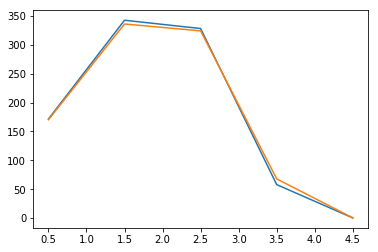

In [11]:
th = []
for index in range(1, len(t)):
    th.append((t[index] + t[index-1])*0.5)
plt.plot(th, di)
plt.plot(th, predicted)